In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [39]:
os.chdir('<filepath>')
df1 = pd.read_csv('Social_Network_Ads.csv')
print(df1)

      User ID  Gender  Age  EstimatedSalary  Purchased
0    11021175    Male   42           121315          0
1    17782313    Male   53            67214          0
2    14603818  Female   59           111005          0
3    18188198  Female   39            53414          0
4    19357305    Male   39           114285          0
..        ...     ...  ...              ...        ...
395  10220446  Female   20           141231          1
396  12387292    Male   50            75848          1
397  10715173  Female   25            82560          1
398  10016842    Male   55           147667          0
399  11699655  Female   54           134972          1

[400 rows x 5 columns]


In [40]:
x = df1.iloc[:,2:4].values
y = df1.iloc[:,4].values

In [41]:
x_test, x_train, y_test, y_train = train_test_split(x,y, test_size = 0.2)
print(x.shape)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(400, 2)
(80, 2)
(320, 2)
(80,)
(320,)


In [42]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p =2)
KNN.fit(x_train,y_train)
print(KNN)

KNeighborsClassifier()


In [43]:
y_pred = KNN.predict(x)
print(y_pred)

[0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0
 0 1 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1
 0 1 1 1 0 0 1 1 1 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0]


In [44]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y,y_pred))

0.64


In [45]:
cm = confusion_matrix (y,y_pred)
print (cm)

[[210  47]
 [ 97  46]]


In [46]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr,tpr,threshold = roc_curve(y,y_pred) #False possitive rate and true possite rate and threshold are calculated
#The FPR is the ratio of negative instances that are incorrectly classified as positive.
#The TPR is the ratio of positive instances that are correctly classified as positive.
roc_df = pd.DataFrame(zip (fpr,tpr,threshold), columns = ['FPR','TPR','Threshold'])
display (roc_df)

,FPR,TPR,Threshold
0,0.000000,0.000000,2
1,0.182879,0.321678,1
2,1.000000,1.000000,0


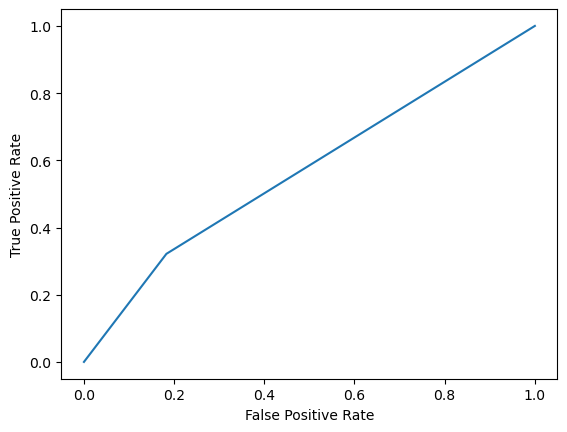

In [47]:
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [51]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors =1)
KNN.fit(x_train,y_train)
y_pred =  KNN.predict (x)
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr,tpr,threshold = roc_curve(y,y_pred)
roc_df = pd.DataFrame(zip (fpr,tpr,threshold), columns = ['FPR','TPR','Threshold'])
from sklearn.metrics import accuracy_score
print ('Accuraccy')
print (accuracy_score (y,y_pred))
cm = confusion_matrix (y,y_pred)
print ('Confusion Matrix')
print (cm)
display (roc_df)

Accuraccy
0.6225
Confusion Matrix
[[177  80]
 [ 71  72]]


,FPR,TPR,Threshold
0,0.000000,0.000000,2
1,0.311284,0.503497,1
2,1.000000,1.000000,0


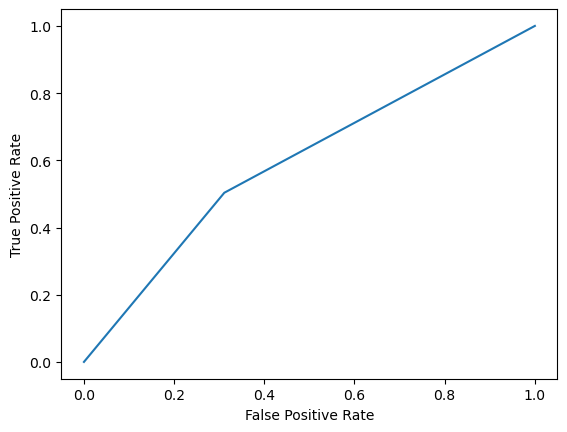

In [52]:
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [53]:
from sklearn.linear_model import LogisticRegression
lr =  LogisticRegression()
lr.fit (x_train,y_train)
y_pred =  lr.predict (x)
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr,tpr,threshold = roc_curve(y,y_pred)
roc_df = pd.DataFrame(zip (fpr,tpr,threshold), columns = ['FPR','TPR','Threshold'])
from sklearn.metrics import accuracy_score
print ('Accuraccy')
print (accuracy_score (y,y_pred))
cm = confusion_matrix (y,y_pred)
print ('Confusion Matrix')
print (cm)
display (roc_df)

Accuraccy
0.6425
Confusion Matrix
[[257   0]
 [143   0]]


,FPR,TPR,Threshold
0,0.0,0.0,1
1,1.0,1.0,0


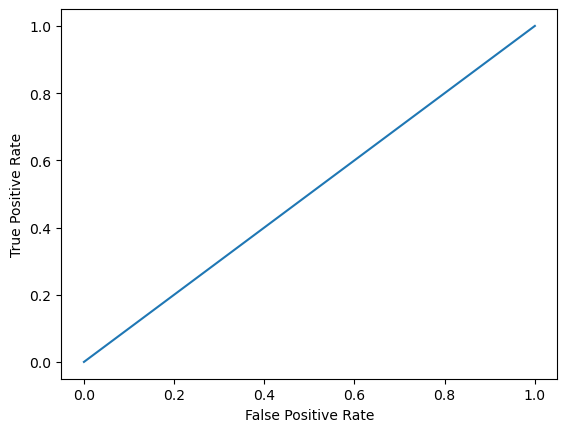

In [54]:
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()